In [ ]:
import pandas as pd

# Load the dataset from the newly uploaded file
file_path = 'merged_dataset (3).csv'
data = pd.read_csv(file_path)

# Check the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State                                           54 non-null     object 
 1   Urban_Percentage                                51 non-null     float64
 2   Total_Population                                51 non-null     float64
 3   Housing_Units                                   51 non-null     float64
 4   Population_Half                                 51 non-null     float64
 5   Low_Income_Half                                 51 non-null     float64
 6   Vehicle_Half                                    51 non-null     float64
 7   Population_1                                    51 non-null     float64
 8   Low_Income_1                                    51 non-null     float64
 9   Vehicle_1                                    

In [ ]:
# Selecting relevant variables and performing necessary transformations
food_desert_vars = ['Vehicle_Half_Percent', 'Population_Half_Percent', 'Low_Income_Half_Percent',
                    'Population_1_Percent', 'Low_Income_1_Percent', 'Vehicle_1_Percent']
food_swamp_vars = ['Convenience stores, 2016', 'Fast-food restaurants, 2016']
food_heaven_vars = ['Grocery stores, 2016', 'Farmers\' markets, 2018', 'Mean_Fruit_Consump_Pct', 'Mean_Veggie_Consump_Pct']

# Subsetting the data to include only relevant variables
subset_data = data[food_desert_vars + food_swamp_vars + food_heaven_vars + ['Mean_Obesity_Pct']].dropna()

# Transformations: Dividing store counts by 10 and inverting fruit and veggie consumption percentages
subset_data['Convenience stores, 2016'] /= 10
subset_data['Fast-food restaurants, 2016'] /= 10
subset_data['Grocery stores, 2016'] /= 10
subset_data['Farmers\' markets, 2018'] /= 10
subset_data['Mean_Fruit_Consump_Pct'] = -subset_data['Mean_Fruit_Consump_Pct']
subset_data['Mean_Veggie_Consump_Pct'] = -subset_data['Mean_Veggie_Consump_Pct']

# Standardizing the variables
scaler = StandardScaler()
standardized_data = scaler.fit_transform(subset_data[food_desert_vars + food_swamp_vars + food_heaven_vars])

# Creating composite scores by averaging the standardized values for each category
subset_data['Food_Desert_Score'] = standardized_data[:, :len(food_desert_vars)].mean(axis=1)
subset_data['Food_Swamp_Score'] = standardized_data[:, len(food_desert_vars):len(food_desert_vars) + len(food_swamp_vars)].mean(axis=1)
subset_data['Food_Heaven_Score'] = standardized_data[:, len(food_desert_vars) + len(food_swamp_vars):].mean(axis=1)

# Validation: Calculating correlations between the new scores and obesity rates
correlations = subset_data[['Food_Desert_Score', 'Food_Swamp_Score', 'Food_Heaven_Score', 'Mean_Obesity_Pct']].corr()



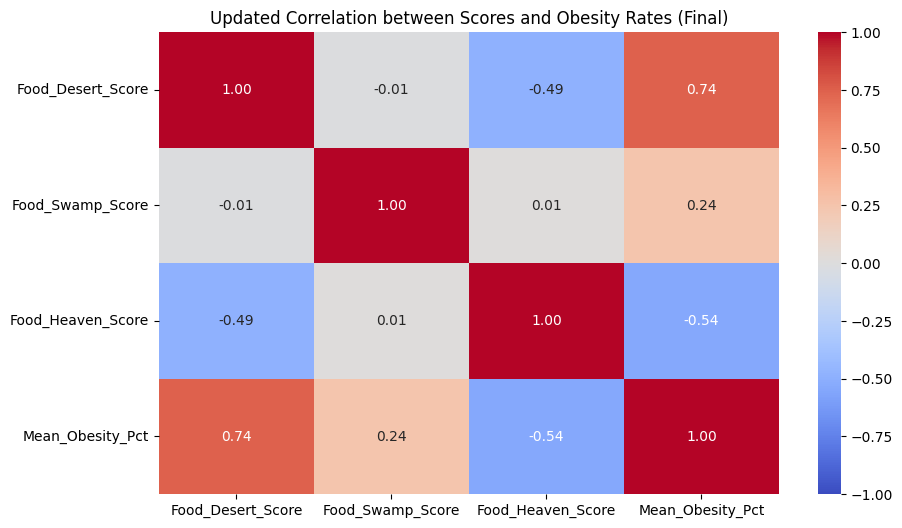

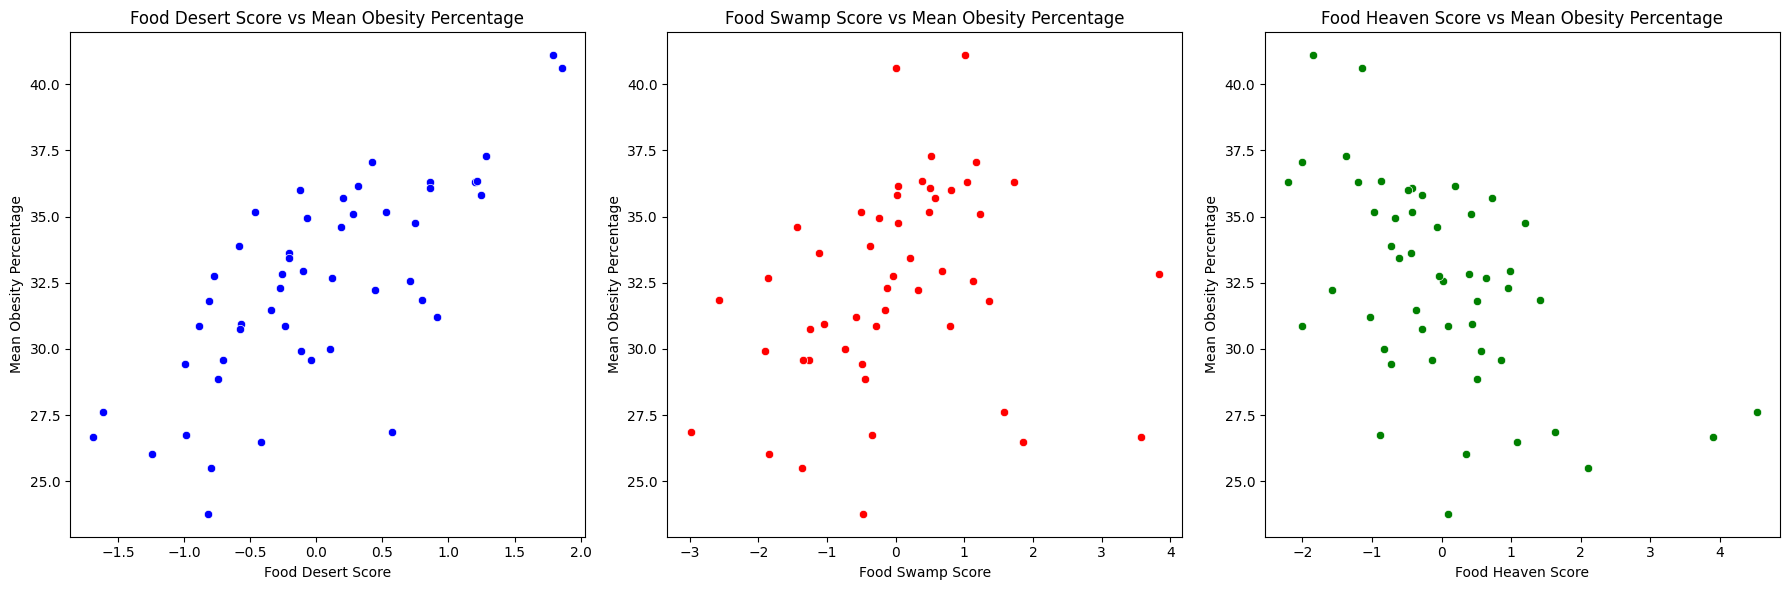

In [ ]:
# Add Mean_Fruit_Consump_Pct and Mean_Veggie_Consump_Pct to the Food Swamp score without inverting
# Add Mean_Fruit_Consump_Pct and Mean_Veggie_Consump_Pct to the Food Heaven score with inverting

# Standardizing the variables again
subset_data['Mean_Fruit_Consump_Pct'] = data['Mean_Fruit_Consump_Pct']
subset_data['Mean_Veggie_Consump_Pct'] = data['Mean_Veggie_Consump_Pct']
standardized_data = scaler.fit_transform(subset_data[food_desert_vars + food_swamp_vars + food_heaven_vars])

# Create the updated Food Swamp score by including non-inverted fruit and veggie consumption percentages
subset_data['Food_Swamp_Score'] = (standardized_data[:, len(food_desert_vars):len(food_desert_vars) + len(food_swamp_vars)].mean(axis=1) +
                                   standardized_data[:, -2:].mean(axis=1))

# Create the updated Food Heaven score by including inverted fruit and veggie consumption percentages
subset_data['Food_Heaven_Score'] = standardized_data[:, len(food_desert_vars) + len(food_swamp_vars):-2].mean(axis=1) - standardized_data[:, -2:].mean(axis=1)

# Re-calculate correlations with the updated scores
correlations_updated_final = subset_data[['Food_Desert_Score', 'Food_Swamp_Score', 'Food_Heaven_Score', 'Mean_Obesity_Pct']].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations_updated_final, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Updated Correlation between Scores and Obesity Rates (Final)')
plt.show()

# Create scatter plots to visualize relationships between scores and obesity rates
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=subset_data, x='Food_Desert_Score', y='Mean_Obesity_Pct', color='blue')
plt.title('Food Desert Score vs Mean Obesity Percentage')
plt.xlabel('Food Desert Score')
plt.ylabel('Mean Obesity Percentage')

plt.subplot(1, 3, 2)
sns.scatterplot(data=subset_data, x='Food_Swamp_Score', y='Mean_Obesity_Pct', color='red')
plt.title('Food Swamp Score vs Mean Obesity Percentage')
plt.xlabel('Food Swamp Score')
plt.ylabel('Mean Obesity Percentage')

plt.subplot(1, 3, 3)
sns.scatterplot(data=subset_data, x='Food_Heaven_Score', y='Mean_Obesity_Pct', color='green')
plt.title('Food Heaven Score vs Mean Obesity Percentage')
plt.xlabel('Food Heaven Score')
plt.ylabel('Mean Obesity Percentage')

plt.tight_layout()
plt.show()


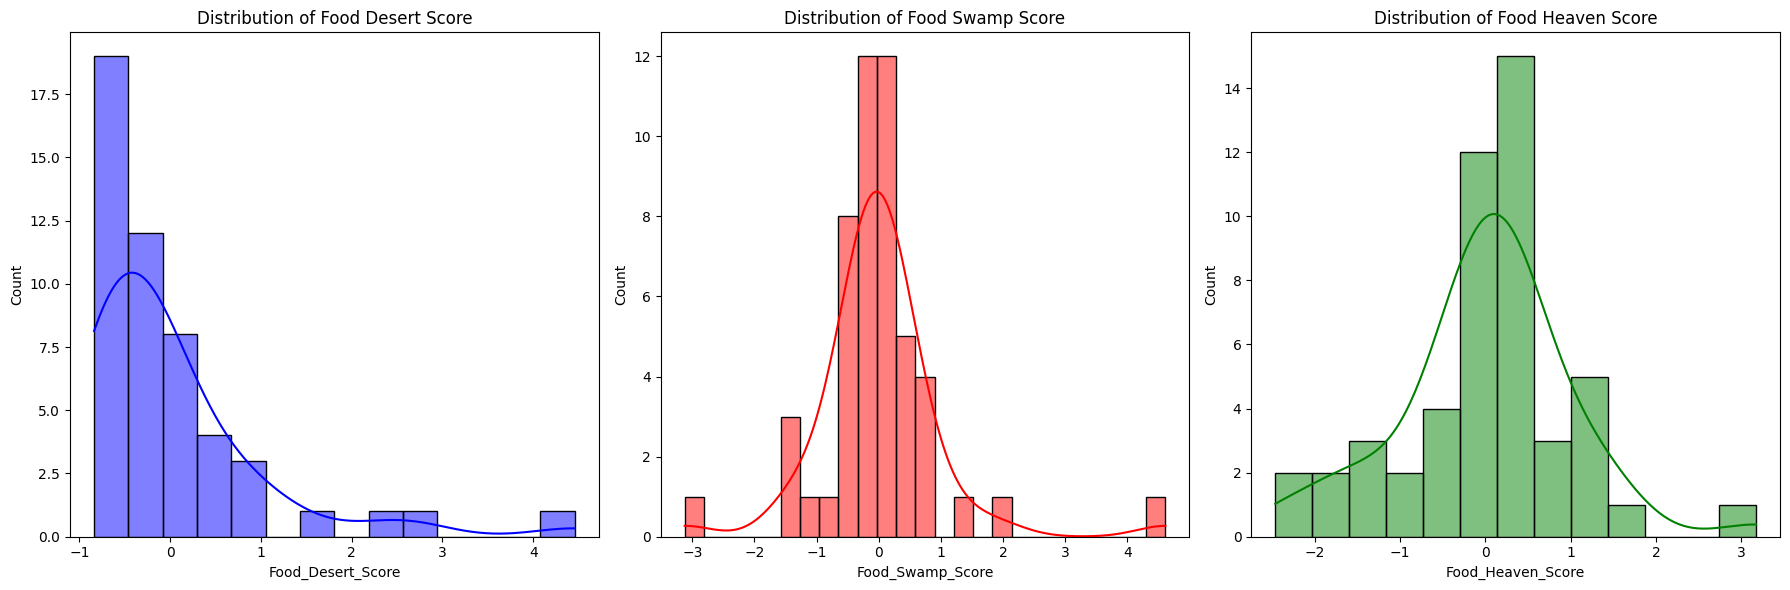

In [ ]:
# Create histograms for the scores
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(final_data['Food_Desert_Score'], kde=True, color='blue')
plt.title('Distribution of Food Desert Score')

plt.subplot(1, 3, 2)
sns.histplot(final_data['Food_Swamp_Score'], kde=True, color='red')
plt.title('Distribution of Food Swamp Score')

plt.subplot(1, 3, 3)
sns.histplot(final_data['Food_Heaven_Score'], kde=True, color='green')
plt.title('Distribution of Food Heaven Score')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Mapping scores to states
map_data = subset_data[['State', 'Food_Desert_Score', 'Food_Swamp_Score', 'Food_Heaven_Score']].dropna()

# Plot Food Desert Score
fig1 = px.choropleth(
    map_data,
    locations='State',
    locationmode='USA-states',
    color='Food_Desert_Score',
    color_continuous_scale="Blues",
    scope="usa",
    title="Food Desert Score by State"
)

# Plot Food Swamp Score
fig2 = px.choropleth(
    map_data,
    locations='State',
    locationmode='USA-states',
    color='Food_Swamp_Score',
    color_continuous_scale="Reds",
    scope="usa",
    title="Food Swamp Score by State"
)

# Plot Food Heaven Score
fig3 = px.choropleth(
    map_data,
    locations='State',
    locationmode='USA-states',
    color='Food_Heaven_Score',
    color_continuous_scale="Greens",
    scope="usa",
    title="Food Heaven Score by State"
)

fig1.show()
fig2.show()
fig3.show()


<ipython-input-51-bfb64de4b434>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-bfb64de4b434>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-bfb64de4b434>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




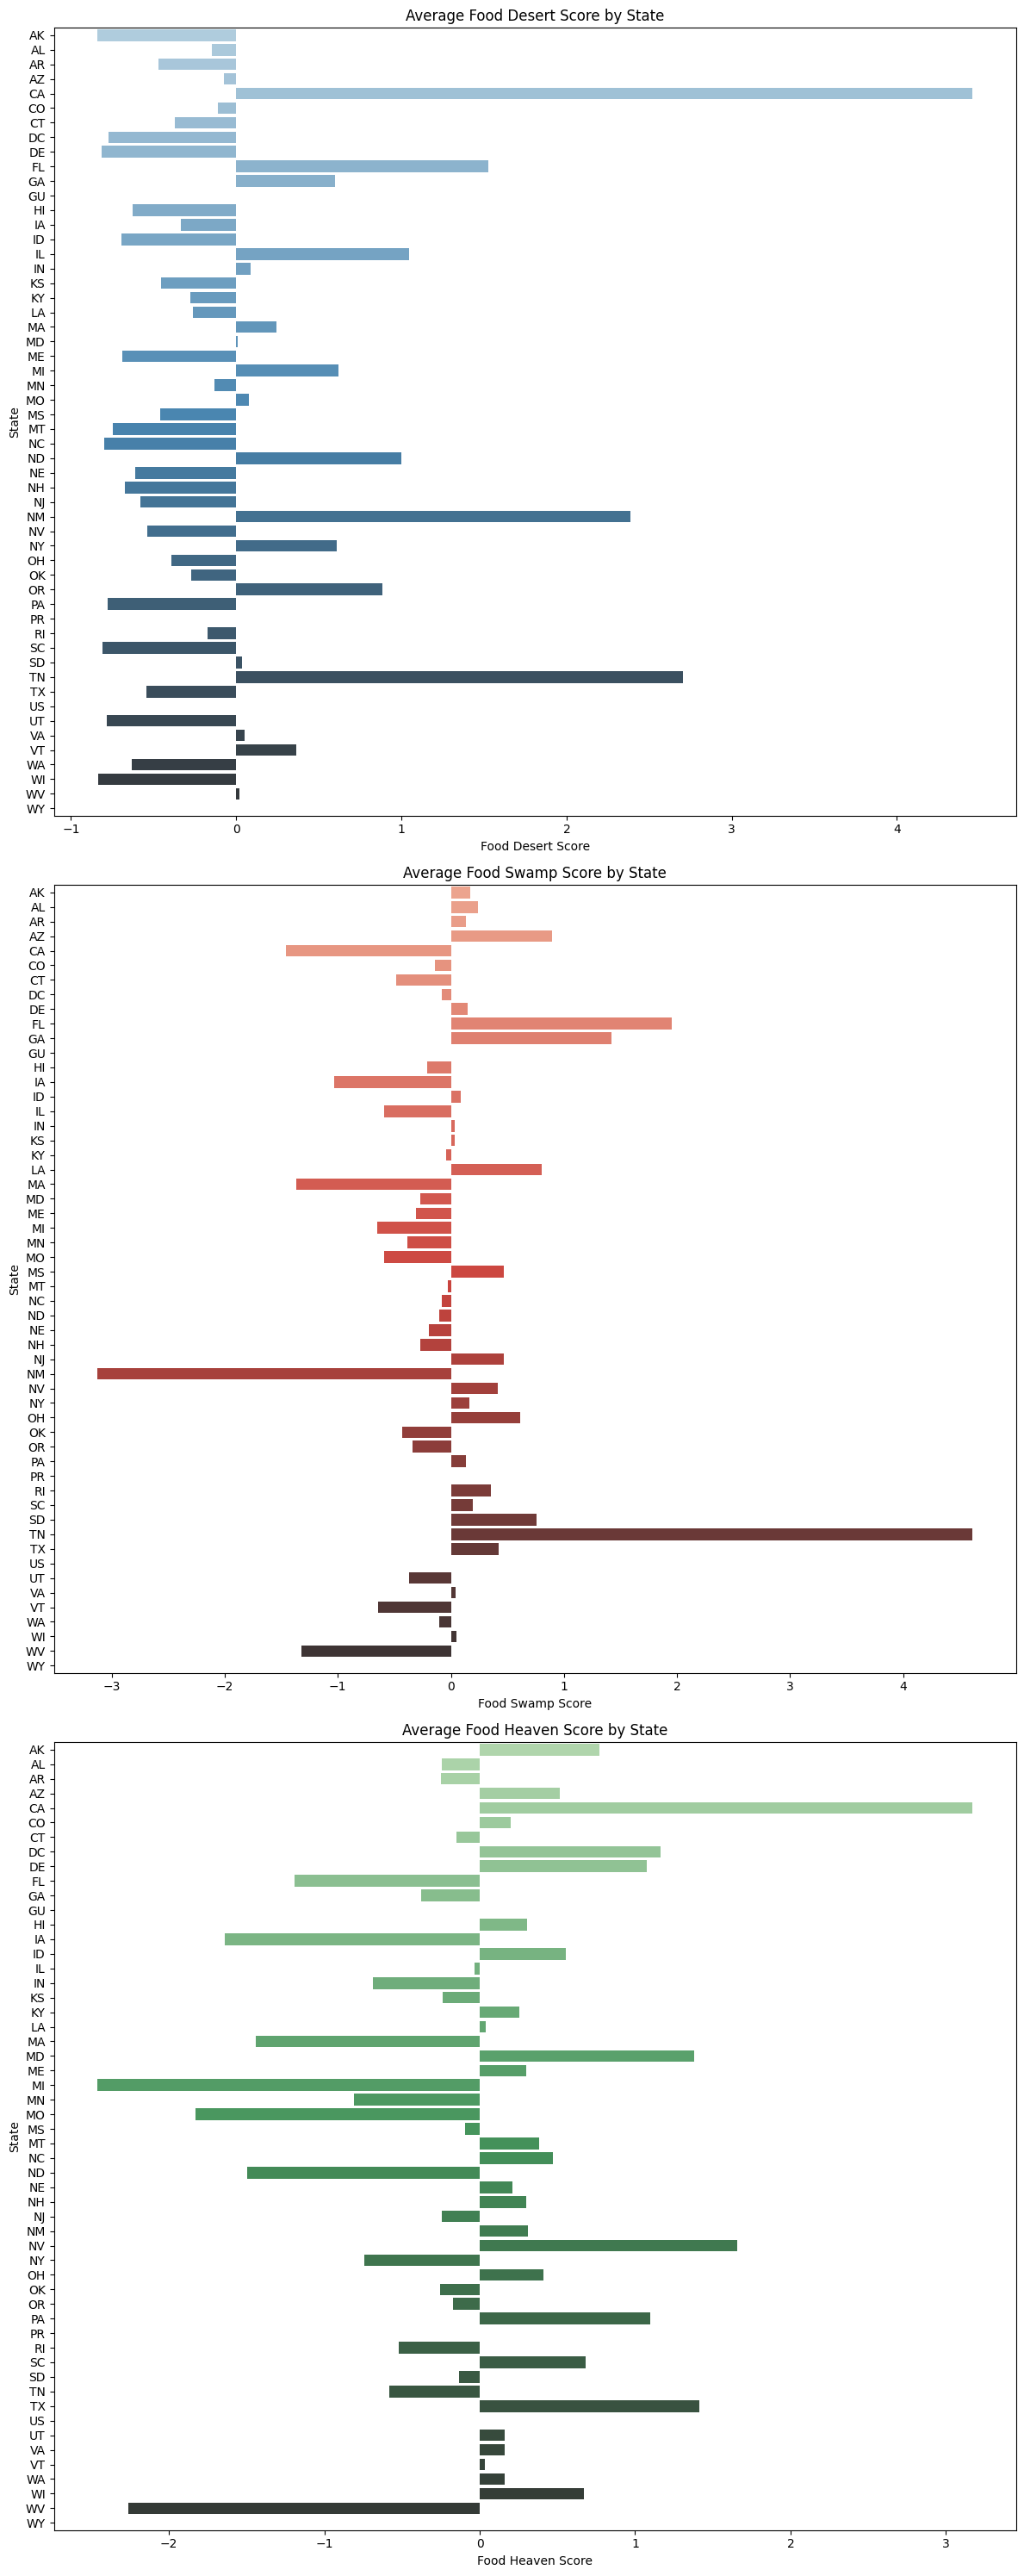

In [ ]:
# Calculate average scores by state
state_scores = final_data.groupby('State')[['Food_Desert_Score', 'Food_Swamp_Score', 'Food_Heaven_Score']].mean().reset_index()

# Create bar plots for average scores by state
plt.figure(figsize=(12, 30))

plt.subplot(3, 1, 1)
sns.barplot(data=state_scores, x='Food_Desert_Score', y='State', palette='Blues_d')
plt.title('Average Food Desert Score by State')
plt.xlabel('Food Desert Score')
plt.ylabel('State')

plt.subplot(3, 1, 2)
sns.barplot(data=state_scores, x='Food_Swamp_Score', y='State', palette='Reds_d')
plt.title('Average Food Swamp Score by State')
plt.xlabel('Food Swamp Score')
plt.ylabel('State')

plt.subplot(3, 1, 3)
sns.barplot(data=state_scores, x='Food_Heaven_Score', y='State', palette='Greens_d')
plt.title('Average Food Heaven Score by State')
plt.xlabel('Food Heaven Score')
plt.ylabel('State')

plt.tight_layout()
plt.show()


Predictive Model